#Exploratory Data Analysis with Haberman's Dataset

**HaberMan's Dataset: ** (https://www.kaggle.com/datasets/gilsousa/habermans-survival-data-set)
This dataset contains cases from a study that was conducted between 1958 and 1970 at the University of Chicago's Billings Hospital on the survival of patients who had undergone surgery for breast cancer.

*   5 Attributes


      1.   Age - Age of patient at time of operation (numerical)
      2.   Year - Patient's year of operation (year - 1900, numerical)
      3.   Nodes - Number of positive axillary nodes detected (numerical)
      4.   Status - Survival status (class attribute)


* All the 4 are Numerical Attributes in which 1 to 3(Age, Year, Nodes) are independent variables and the 4th(Status) is a dependent Variable.



In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

'''Downloading haberman.csv from "C:/User/HP/Desktop/haberman.csv"'''
#Import haberman.csv in the Pandas Dataframe
haberman = pd.read_csv("haberman.csv")

In [ ]:
#Getting the Shape of the Dataset for knowing the number of Data Points and Features
print(haberman.shape)

(306, 4)


In [ ]:
#Retriving Field Names
print(haberman.columns)

Index(['age', 'year', 'nodes', 'status'], dtype='object')


In [ ]:
#Finding the Number of DataPoints for each Class
haberman["age"].value_counts()
haberman["year"].value_counts()
haberman["nodes"].value_counts()


0     136
1      41
3      20
2      20
4      13
7       7
6       7
8       7
9       6
5       6
13      5
14      4
11      4
22      3
19      3
23      3
15      3
10      3
20      2
12      2
21      1
52      1
30      1
16      1
24      1
46      1
18      1
35      1
17      1
25      1
28      1
Name: nodes, dtype: int64

#2-D Scatter Plot

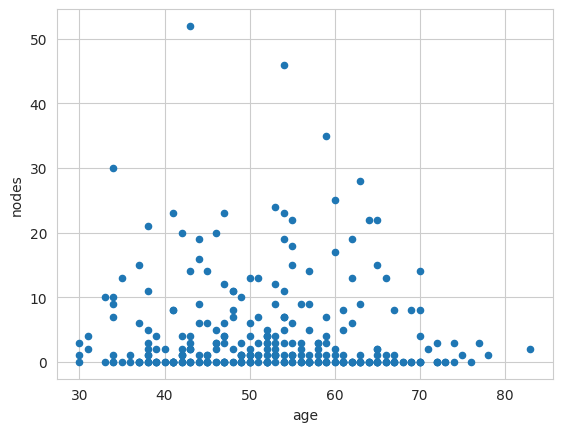

In [ ]:
haberman.plot(kind='scatter', x='age', y='nodes') ;
plt.show()

#We Cannot get any insight through this Plot
#Colouring the Plot may shed some light on the key point observations

#2-D Coloured Scatter Plot

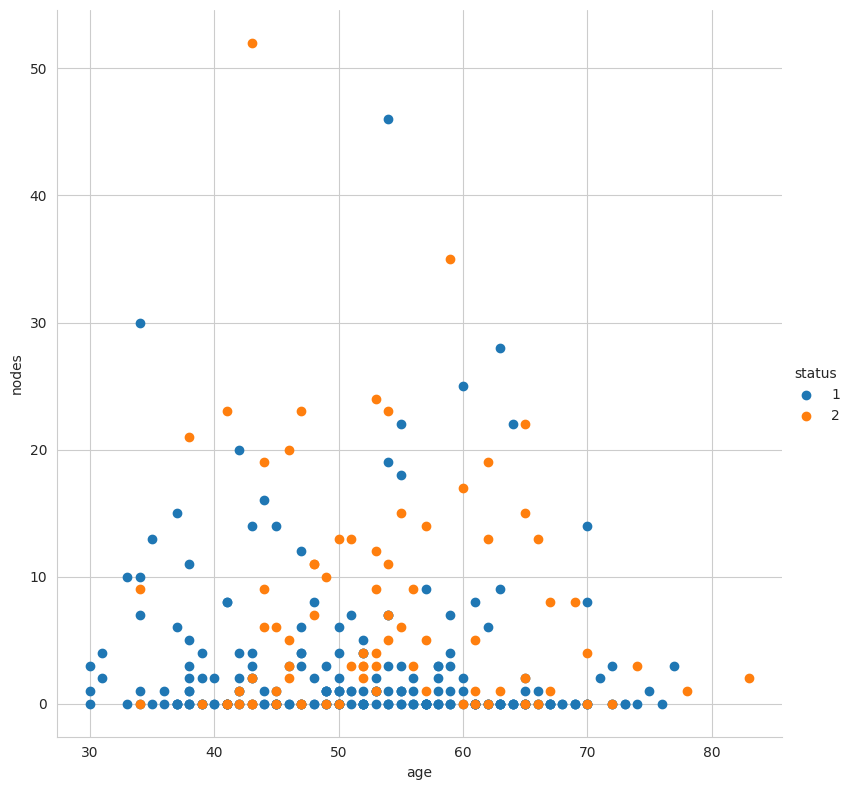

In [ ]:
#The blue dots are dense around the age group of 32-38 and 50-58 and there are no Orange Dots there
#No Blue Dots present near the age group 80
#A large number of blue dots are found above Positive Axillary Node.
#There is an absense of blue  and orange dots below the age group of 30

sns.set_style('whitegrid')
sns.FacetGrid(haberman, hue ='status',  height=8) \
.map(plt.scatter, 'age', 'nodes') \
.add_legend()
plt.show()



#Observation


1.   Most patients aged 30-40 with breast cancer survive.
2.   No Patients after the age group 80 has survived with Positive Axillary.
3.   Nearly all patients aged 50-60 without positive axillary nodes survive.
4.   Some patients with over 10 positive axillary nodes have survived breast cancer.
5.   Rare for patients to have over 30 positive axillary nodes.

Drawing a multiple 2-D scatter plots for each combination of features?
How many cobinations exist? 3C2 = 3.


#Pair Plot

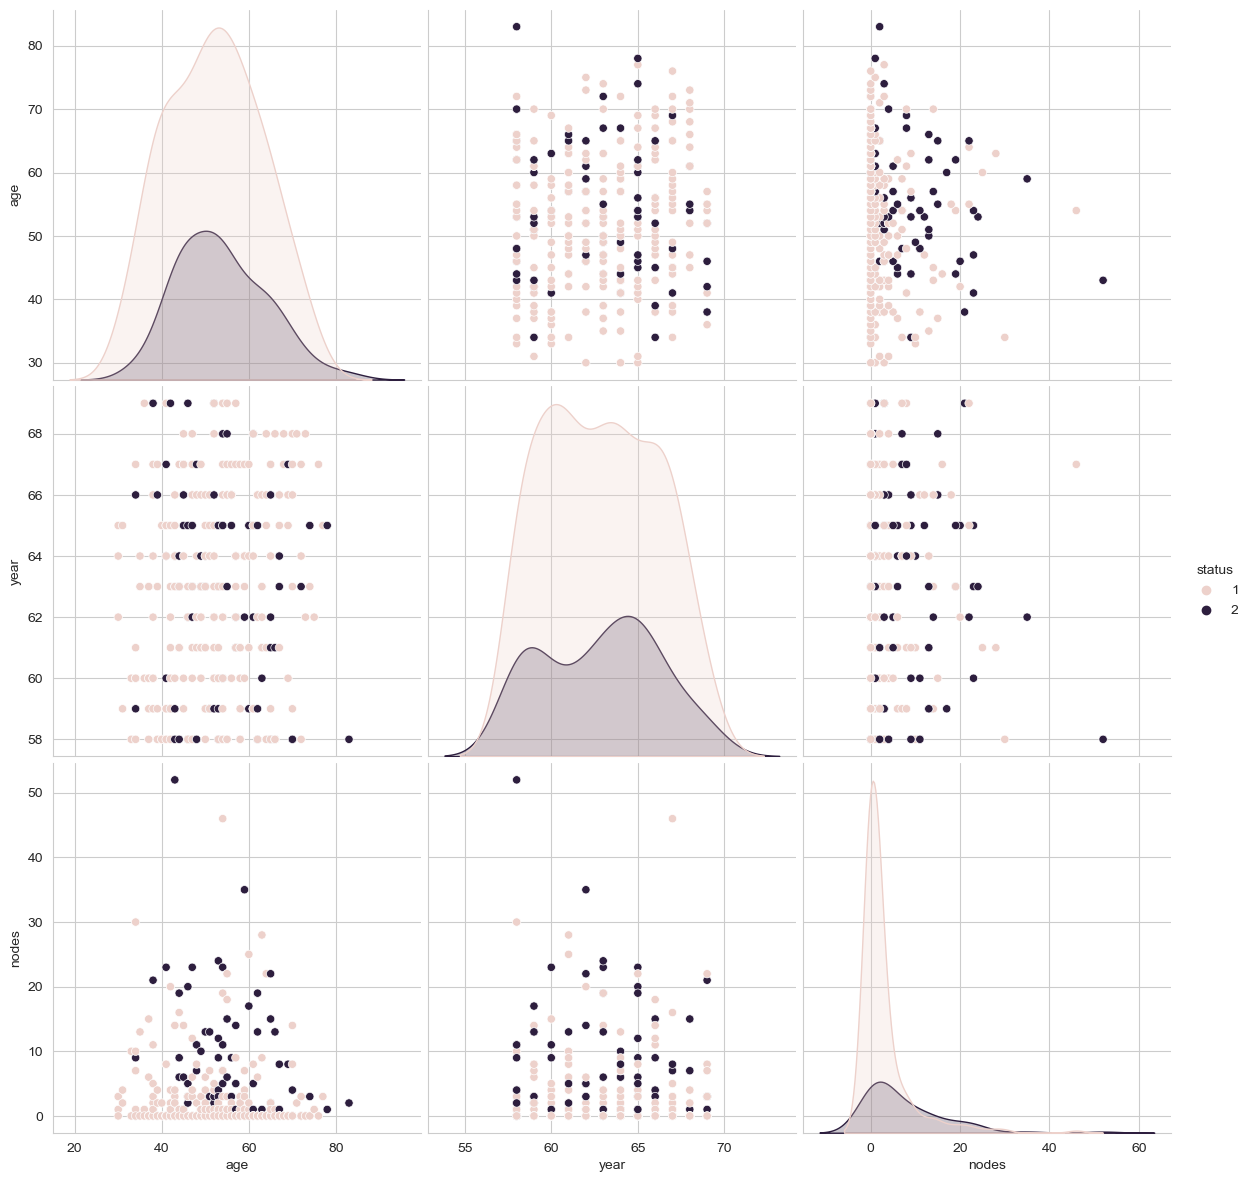

In [6]:
#Pair plot is used to understand the best set of features to explain a relationship between two  variables or to form the most separated clusters
 
sns.set_style('whitegrid') 
sns.pairplot(haberman, hue = 'status', height = 4)
plt.show()


#observation

1.   **Positive Axillary Nodes and Age of Patient are the most useful features to identify the survival status of a patient.**
2.   Majority of the patients who have undergone operations during the years 1961 and 1968 have survived 5 years or longer



#PDF and CDF

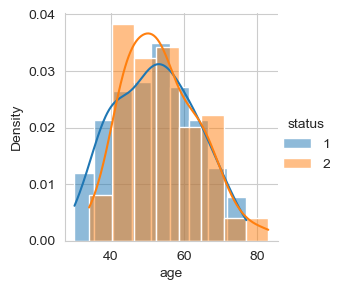

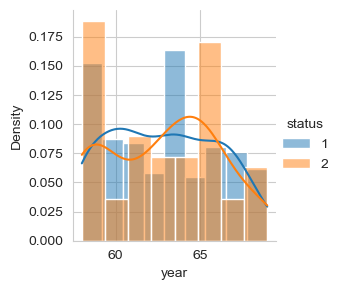

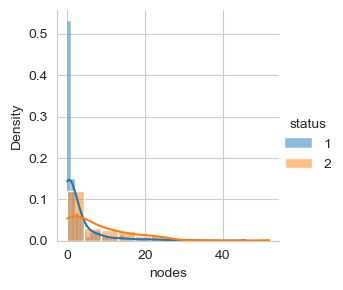

In [7]:
import matplotlib
matplotlib.rcParams['figure.figsize']=(6,3.8)

# PDF FOR Age
sns.FacetGrid(haberman, hue="status").map(sns.histplot,'age',kde=True,stat="density").add_legend()
plt.show()

# PDF FOR Operation Year
sns.FacetGrid(haberman, hue="status").map(sns.histplot,'year',kde=True,stat="density").add_legend()
plt.show()

# PDF FOR Number of positive axil nodes
sns.FacetGrid(haberman, hue="status").map(sns.histplot,'nodes',kde=True,stat="density").add_legend()
plt.show()




Observation Of PDF


1. PDF based on **Age**:  Ages 30-40 have higher survival odds. Ages 40-60 have fewer survival chances. Ages 40-45 have observed highest deaths. Hence, we cannot predict the survival of patients based on the 'Age' Feature
2. PDF based on **Year**: Most unsuccessful operations in 1960 and 65. Most successful was in 1961. The success probaility of an operation cannot be based on Year Factor
3.  PDF based on **positive axillary nodes**: Positive Axillary Nodes are a crucial breast cancer indicator, with zero nodes indicating high survival chances and even one node suggesting good survival odds. As the number of positive nodes increases, survival likelihood decreases. Few patients have over 25 positive nodes, making this attribute vital for analysis.

#CDF

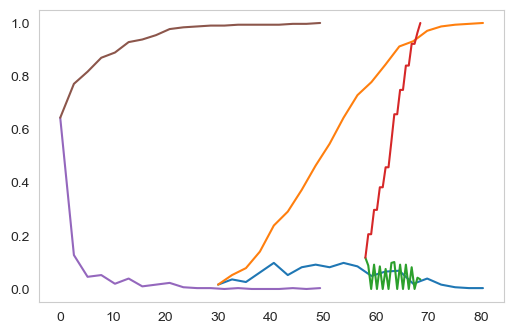

In [10]:
pdf,bin_edges = np.histogram(haberman['age'],bins=20,density=True)
pdf = pdf/sum(pdf)

# Calcuting CDF
cdf = np.cumsum(pdf)

# plot PDF
plt.plot(bin_edges[:-1],pdf)
# plot CDF
plt.plot(bin_edges[:-1],cdf)

# -------------------------------------------

pdf,bin_edges = np.histogram(haberman['year'],bins=20,density=True)
pdf = pdf/sum(pdf)

# Calcuting CDF
cdf = np.cumsum(pdf)

# plot PDF
plt.plot(bin_edges[:-1],pdf)
# plot CDF
plt.plot(bin_edges[:-1],cdf)

# ----------------------------------------------

pdf,bin_edges = np.histogram(haberman['nodes'],bins=20,density=True)
pdf = pdf/sum(pdf)

# Calcuting CDF
cdf = np.cumsum(pdf)

# plot PDF
plt.plot(bin_edges[:-1],pdf)
# plot CDF
plt.plot(bin_edges[:-1],cdf)

plt.grid()
plt.show()

#BOX PLOT

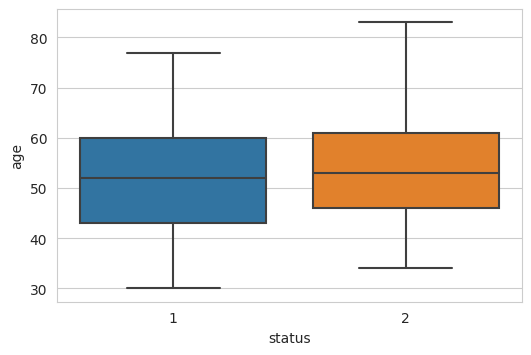

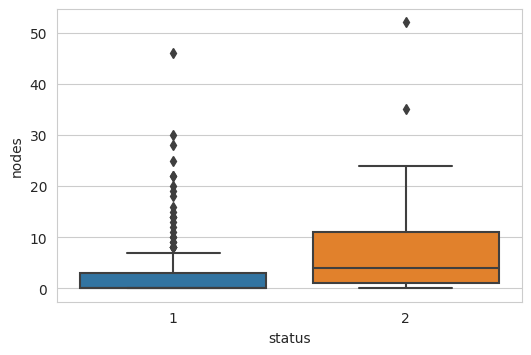

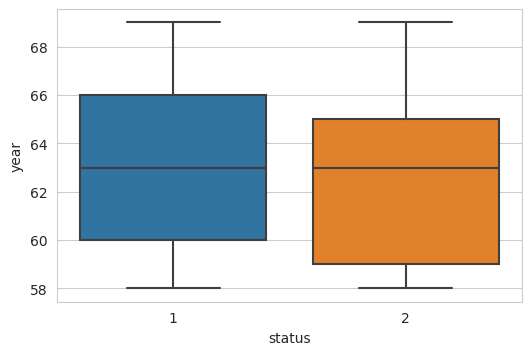

In [61]:
#Age
sns.boxplot(x='status' , y='age' , data=haberman)
plt.show()

#axil_nodes
sns.boxplot(x='status' , y='nodes' , data=haberman)
plt.show()

#axil_nodes
sns.boxplot(x='status' , y='year' , data=haberman)
plt.show()


#Observations

1.   Outliers in axillary nodes are more noticeable in Class 1 (survived >5 years) and even more so in Class 2 (died within 5 years) of Survival status.
2.   There are no outliers in the age and operation years for their respective categories.



#Violin Plot

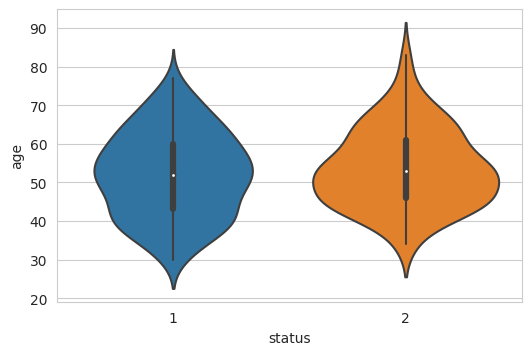

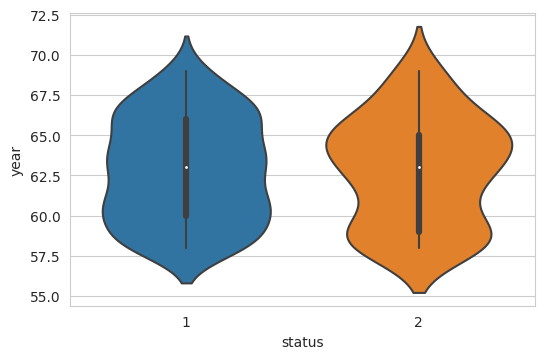

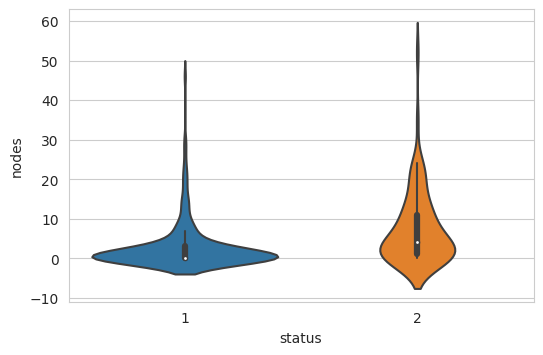

In [62]:
# Age
sns.violinplot(x='status' , y='age', data=haberman)
plt.show()

# Op_Year
sns.violinplot(x='status' , y='year', data=haberman)
plt.show()

# axil_nodes
sns.violinplot(x='status' , y='nodes', data=haberman)
plt.show()

#Conclusion


1.   Most patients aged 30–40 survive breast cancer.
2.   Very few patients have more than 25 positive axillary nodes.
3.   Patients operated on between 1961 and 1968 tend to survive for at least 5 years after the operation.
4.   Survival in breast cancer is often inversely related to the number of positive axillary nodes.
5.   Patients with zero nodes have high survival chances, but exceptions exist.
6.   Few patients with many nodes survive, and some with none do not.
**7.   Best feature for classification is Age and axil_nodes**

